In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

In [2]:
cwd = os.getcwd()
os.chdir('..')
from functions import \
    extract_gist_features, \
    diversity_experiment_constrained_val
os.chdir(cwd)

Using TensorFlow backend.


In [3]:
# --- constants/globals --- #

# parameter for gist features
NBLOCKS = 4

# training hyperparameters
LR = .001
MOMENTUM = .9
BATCH_SIZE = 32
RUNS = 10
PATIENCE = 2

# dataset parameters
TRAIN_SIZES = [10, 20, 30, 40, 50, 
               60, 70, 80, 90, 100, 
               150, 200, 250, 500, 750, 
               1000, 2000]
VAL_PROP = .5

In [4]:
# load the cifar-10 data
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [5]:
# extract autoencoded features
train_features = np.load('encode-features-flat.npy')

In [6]:
# perform experiment
results_df = diversity_experiment_constrained_val(x_train, y_train, 
                                                  train_features, 
                                                  x_test, y_test, 
                                                  train_sizes=TRAIN_SIZES,
                                                  val_prop=VAL_PROP,
                                                  runs=RUNS,
                                                  lr=LR, momentum=MOMENTUM, 
                                                  batch_size=BATCH_SIZE,
                                                  patience=PATIENCE,
                                                  verbose=0)

performing experiment for train size = 10
performing experiment for train size = 20
performing experiment for train size = 30
performing experiment for train size = 40
performing experiment for train size = 50
performing experiment for train size = 60
performing experiment for train size = 70
performing experiment for train size = 80
performing experiment for train size = 90
performing experiment for train size = 100
performing experiment for train size = 150
performing experiment for train size = 200
performing experiment for train size = 250
performing experiment for train size = 500
performing experiment for train size = 750
performing experiment for train size = 1000
performing experiment for train size = 2000


In [7]:
results_df.to_csv('cifar10-flat-autoencoder-results.csv')

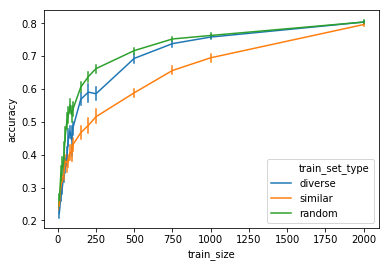

In [8]:
sns.lineplot(data=results_df, 
             x='train_size', y='accuracy', hue='train_set_type',
             err_style='bars')

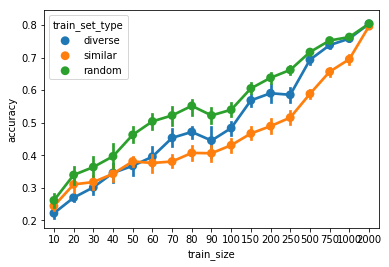

In [9]:
sns.pointplot(x='train_size', y='accuracy', hue='train_set_type', 
              data=results_df)